In [1]:
from src.model import TrofeoAmicizia
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar

# di prova, eliminabile
participants = 205
registrationPrice = 10
participationMedalsPrice = 1.40
gadgetPrice = 1.2

categories = 11
podiumsForSpecialityEachCategory = 5
averagePodiumMedalsPrice = 1.85
averagePodiumCupPrice = 8.5

availableWorkers = 14
workersForRound = {1:13, 2:13, 3:13, 4:14, 5:14, 6:0}
workersSalaryForRound = 7
judgesForRound = {1:0, 2:0, 3:0, 4:0, 5:1, 6:0}
judges_salary_for_round = 10

foodCost = 25

photosPerAtlete = 0.6
profitPerPhoto = 1.5


# function to maximize
def neg_profit(registrationPrice):
    ev = TrofeoAmicizia(participants,registrationPrice, participationMedalsPrice, gadgetPrice,
                        categories, podiumsForSpecialityEachCategory, averagePodiumMedalsPrice, averagePodiumCupPrice,
                        availableWorkers, workersForRound, workersSalaryForRound, judgesForRound,
                        judges_salary_for_round,
                        foodCost,
                        photosPerAtlete, profitPerPhoto)
    return -ev.profit()

# optimization
res = minimize_scalar(neg_profit, bounds=(9,10.), method='bounded')
print(f"Prezzo ottimo: €{res.x:.2f}  |  Utile stimato: €{-res.fun:,.0f}")

Prezzo ottimo: €10.00  |  Utile stimato: €612


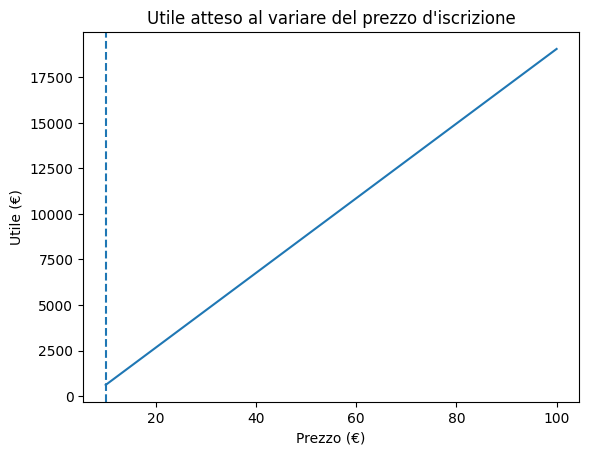

In [2]:
import matplotlib.pyplot as plt

prezzi = np.linspace(10, 100, 10)
utili = [-neg_profit(p) for p in prezzi]

plt.plot(prezzi, utili)
plt.axvline(res.x, linestyle="--")
plt.title("Utile atteso al variare del prezzo d'iscrizione")
plt.xlabel("Prezzo (€)")
plt.ylabel("Utile (€)")
plt.show()

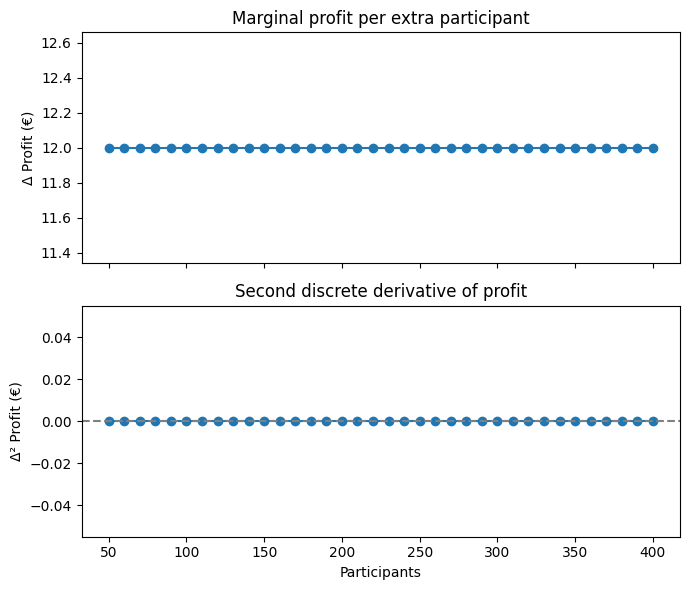

In [3]:
# %%
# 1. setup baseline event -----------------------------------------------
from src.model import TrofeoAmicizia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

baseline_kwargs = dict(
    participation_price=10,
    participation_medal_price=1.4,
    gadget_price=1.2,
    categories=11,
    podiums_for_speciality_each_category=5,
    average_podium_medal_price=1.85,
    average_cup_price=9,
    available_workers=14,
    workers_for_round={1: 13, 2: 13, 3: 13, 4:14, 5:14, 6:0},
    workers_salary_for_round=7,
    judges_for_round={1: 0, 2: 0, 3: 0, 4:1, 5:0, 6:0},
    judges_salary_for_round=10,
    food_cost=30,
    photos_per_atlete=1.5,
    profit_per_photo=0.55,
)

# %%
# 2. sweep participants and compute derivatives --------------------------
records = []
for n in range(50, 401, 10):   # da 50 a 400 partecipanti
    ev = TrofeoAmicizia(participants=n, **baseline_kwargs)
    records.append(
        dict(
            participants=n,
            profit=ev.profit(),
            d_profit=ev.dprofit_dparticipants(),
            d2_profit=ev.d2profit_dparticipants2()
        )
    )

df = pd.DataFrame(records)
df.head()      # mostra le prime righe

# %%
# 3. plot: marginal profit and second derivative -------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

ax1.plot(df["participants"], df["d_profit"], marker="o")
ax1.set_ylabel("Δ Profit (€)")
ax1.set_title("Marginal profit per extra participant")

ax2.plot(df["participants"], df["d2_profit"], marker="o")
ax2.axhline(0, color="grey", linestyle="--")
ax2.set_xlabel("Participants")
ax2.set_ylabel("Δ² Profit (€)")
ax2.set_title("Second discrete derivative of profit")

plt.tight_layout()
plt.show()